<a href="https://colab.research.google.com/github/dsaint31x/AOculus/blob/master/Ch04_ML_Training_Models_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

**Logistic Regression** (also called **Logit Regression**) *is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?)*. 

> classification에 사용됨. 즉, 범주형 데이터 결과를 얻음

If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). 

**This makes it a binary classifier.**



## Estimating Probabilities

So how does Logistic Regression work? 

Just like a Linear Regression model, a Logistic Regression model computes **a weighted sum of the input features (plus a bias term)**, but instead of outputting the result directly like the Linear Regression model does, it outputs **the logistic of this result** (see Equation 4-13).

### Equation 4-13. Logistic Regression model estimated probability (vectorized form)

$$
\hat{p} = h_\theta (\textbf{x}) = \sigma(\textbf{x}^\text{T}\boldsymbol{\theta})
$$

The logistic - noted $\sigma(\cdot)$ - is a **sigmoid function** (i.e., $S$-shpaed) that outputs a number between 0 and 1. It is defined as shown in Equation 4-14 and Figure 4-21.

### Equation 4-14. Logistic function

$$
\sigma(t)=\frac{1}{1+\exp(-t)}
$$


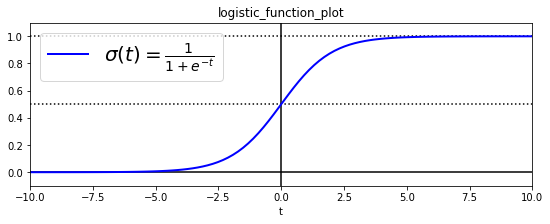

In [3]:
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(9, 3))
plt.title("logistic_function_plot")
plt.plot([-10, 10], [0, 0], "k-")     # 0.0, x-axis
plt.plot([-10, 10], [0.5, 0.5], "k:") # 0.5
plt.plot([-10, 10], [1, 1], "k:")     # 1.0
plt.plot([0, 0], [-1.1, 1.1], "k-")   # y-axis

plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")

plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

Once the **Logistic Regression** model has estimated the probability $\hat{p}=h_\theta (\textbf{x})$ that an instance $\textbf{x}$ belongs to the positive class, it can make its prediction $\hat{y}$ easily (see Equation 4-15).

Equation 4-15. Logistic Regression model prediction

$$
\hat{y} = \left\{ \begin{matrix} 0 & \text{ if } \hat{p}<0.5 \\ 1 & \text{ if } \hat{p} \ge 0.5 \end{matrix} \right.
$$


 Notice that $\sigma(t) < 0.5$ when $t < 0$, and $\sigma(t) \ge 0.5$ when $t \ge 0$, so a **Logistic Regression model** predicts $1$ if $\textbf{x}^{\text{T}}\boldsymbol{\theta}$ is positive and $0$ if it is negative.

> ### NOTE
> 
> The score $t$ is often called the **logit**. 
> The name comes from the fact that the logit function, defined as $\text{logit}(p) = \log(p / (1 – p))$, is **the inverse of the logistic function**. 
>
>Indeed, if you compute the **logit** of the estimated probability $p$, you will find that the result is $t$.
>
> The logit is also called the **log-odds**, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.






## Training and Cost Function

Now you know how a **Logistic Regression** model 
* estimates probabilities and 
* makes predictions. 

But how is it trained? The objective of training is to set the parameter vector $\boldsymbol{\theta}$ so that the model estimates high probabilities for positive instances ($y = 1$) and low probabilities for negative instances ($y = 0$). 

This idea is captured by the cost function shown in Equation 4-16 for a single training instance $\textbf{x}$.

### Equation 4-16. Cost function of a single training instance

$$
c(\boldsymbol{\theta})= \left\{ \begin{matrix} 
-\log(\hat{p}) & \text{ if  } y=1 \\
-\log(1-\hat{p}) & \text{ if  } y=0 
\end{matrix}\right.
$$

This cost function makes sense because 
* $–\log(t)$ grows very large when $t$ approaches $0$, 
   * so the cost will be large if the model estimates a probability close to 0 for a positive instance, and 
   * it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, 
* $–\log(t)$ is close to $0$ when $t$ is close to $1$,
   * so the cost($1–\log(t)$) will be close to 0 if the estimated probability is close to 0 for a negative instance or 
   * close to 1 for a positive instance, which is precisely what we want.

The cost function over the whole training set is the **average cost over all training instances**. It can be written in a single expression called the log loss, shown in Equation 4-17.

### Equation 4-17. Logistic Regression cost function (log loss)

$$
J(\boldsymbol{\theta}) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)}\log \left(\hat{p}^{(i)}\right)+ (1-y^{(i)})\log\left(1-\hat{p}^{(i)}\right)\right]
$$

The bad news is that *there is **no known closed-form equation** to compute the value of $\boldsymbol{\theta}$ that minimizes this cost function* (there is no equivalent of the Normal Equation). 

The good news is that *this cost function is **convex**, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum* (if the learning rate is not too large and you wait long enough). 

The partial derivatives of the cost function with regard to the $j^\text{th}$ model parameter $\theta_j$ are given by Equation 4-18.

### Equation 4-18. Logistic cost function partial derivatives

$$
\dfrac{\partial}{\partial \theta_j}J(\boldsymbol{\theta})=\frac{1}{m}\sum_{i=1}^m \left( \sigma \left( \boldsymbol{\theta}^\text{T}\textbf{x}^{(i)}\right) - y^{(i)}\right)x_j^{(i)}
$$

This equation looks very much like Equation 4-5: 
* for each instance it computes the prediction error and multiplies it by the $j^\text{th}$ feature value, and
* then it computes the average over all training instances. 

Once you have the gradient vector containing all the partial derivatives, you can use it in the **Batch Gradient Descent** algorithm. That’s it: **you now know how to train a Logistic Regression model**. 

For Stochastic GD you would take one instance at a time, and for Mini-batch GD you would use a mini-batch at a time.



## Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the **sepal(꽃받침)** and **petal(꽃잎)** length and width of **150 iris flowers** of three different species: 
* Iris setosa, 
* Iris versicolor, and 
* Iris virginica 

(see Figure 4-22).

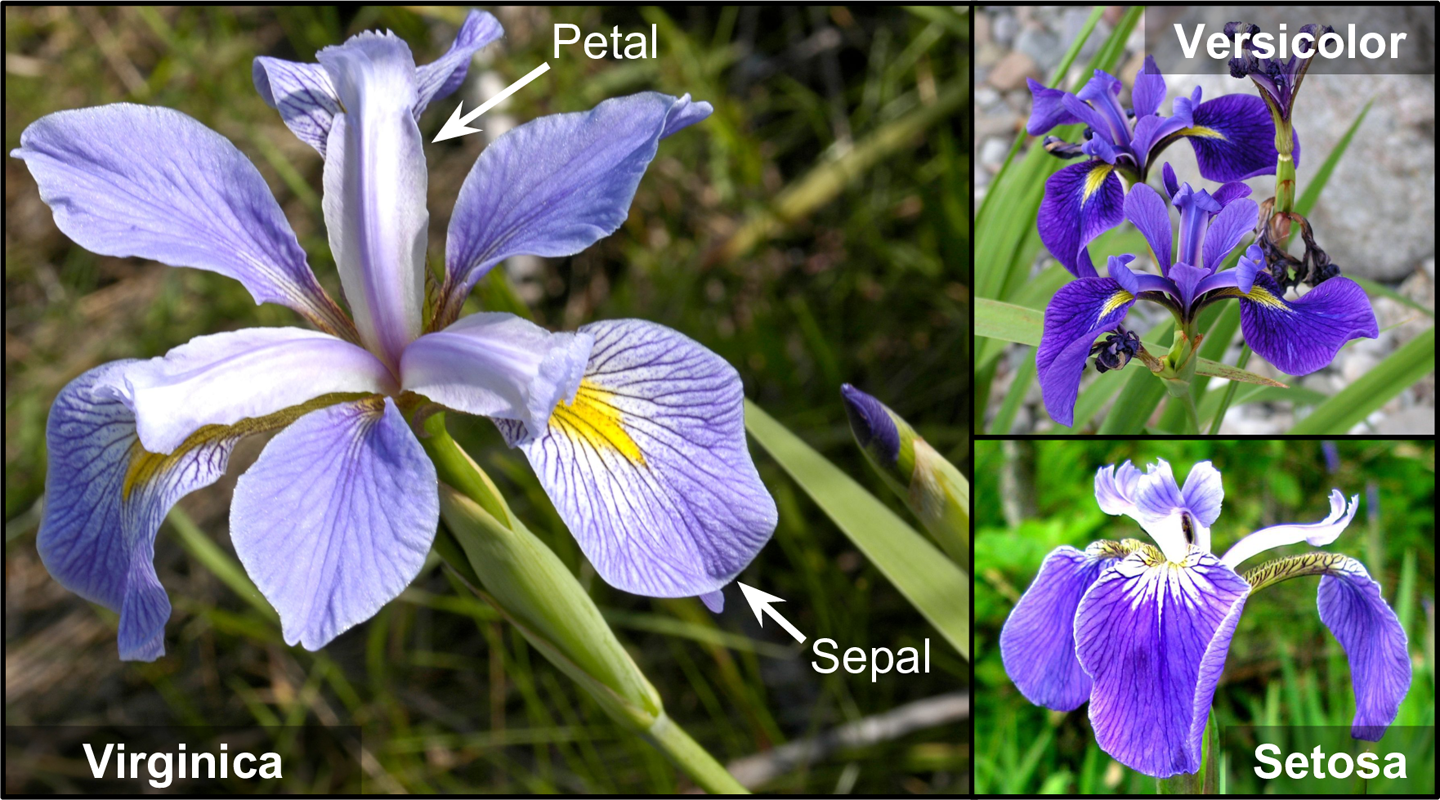

Let’s try to build a classifier to detect the Iris virginica type based only on the petal width feature. First let’s load the data:

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

Now let’s train a Logistic Regression model:

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 cm to 3 cm:

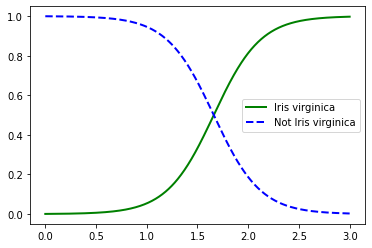

In [9]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.legend()

The figure in the book actually is actually a bit fancier:

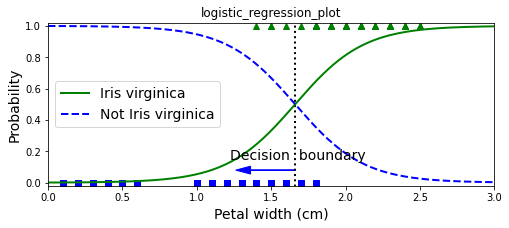

In [20]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary[0]+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
# plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.title("logistic_regression_plot")
plt.show()

The petal width of *Iris virginica* flowers (represented by triangles) ranges **from 1.4 cm to 2.5 cm**, while the *other iris flowers* (represented by squares) generally have a smaller petal width, ranging **from 0.1 cm to 1.8 cm**. 

Notice that there is a bit of **overlap**. 

* **Above about 2 cm** the classifier is highly confident that the flower is an *Iris virginica* (it outputs a high probability for that class), 
* while **below 1 cm** it is highly confident that it is *not an Iris virginica* (high probability for the “Not Iris virginica” class). 
* In between these extremes, the classifier is **unsure**. 

However, if you ask it to predict the class (using the `predict()` method rather than the `predict_proba()` method), it will return whichever class is **the most likely**. 

Therefore, there is a **decision boundary** *at around 1.6 cm* where *both probabilities are equal to 50%*: 
* if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris virginica, and 
* otherwise it will predict that it is not (even if it is not very confident):



In [24]:
print(decision_boundary)

[1.66066066]


In [23]:
log_reg.predict([[1.7], decision_boundary, [1.5]])

array([1, 1, 0])

Figure below shows the same dataset, but this time displaying **two features**: 
* petal width and 
* petal length. 

Once trained, the **Logistic Regression** classifier can, based on these two features, estimate the probability that a new flower is an *Iris virginica*. 

The dashed line represents the points where the model estimates a 50% probability: this is the model’s **decision boundary**. 

Note that it is a linear boundary. Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being *Iris virginica*, according to the model.

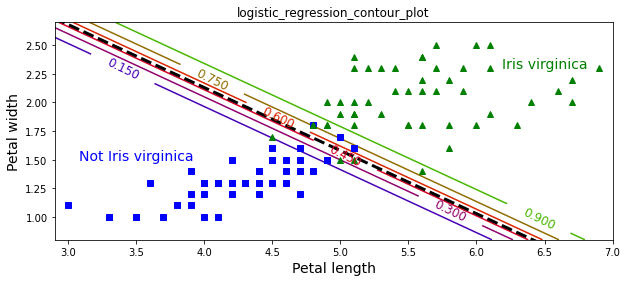

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.title("logistic_regression_contour_plot")
plt.show()

Just like the other linear models, Logistic Regression models can be regularized using $l1$ or $l2$ penalties. Scikit-Learn actually adds an $l2$ penalty by default.

> ### NOTE
>
> The **hyperparameter** *controlling the regularization strength* of a Scikit-Learn **LogisticRegression** model **is not alpha** (as in other linear models), but **its inverse**: `C`. 
> * The higher the value of `C`, the **less** the model is **regularized** (데이터 의존성이 심해짐).

## Softmax Regression

The **Logistic Regression model can be generalized to support *multiple classes* directly**, without having to train and combine multiple binary classifiers (as discussed in Chapter 3). 

This is called **Softmax Regression**, or **Multinomial Logistic Regression**.

The idea is simple: when given an instance $\textbf{x}$, the **Softmax Regression** model 
* first computes a score $s_k(\textbf{x})$ for each class $k$, 
* then estimates the probability of each class by applying the **softmax function** (also called the **normalized exponential**) to the scores. 

The equation to compute $s_k(\textbf{x})$ should look familiar, as it is just like the equation for Linear Regression prediction (see Equation 4-19).

### Equation 4-19. Softmax score for class $k$

$$
s_k(\textbf{x})= \textbf{x}^\text{T}\boldsymbol{\theta}^{(k)}
$$

Note that each class has its own dedicated parameter vector $\theta^{(k)}$. All these vectors are typically stored as rows in a *parameter matrix* $\boldsymbol{\Theta}$.

Once you have computed the score of every class for the instance $\textbf{x}$, you can estimate the probability $\hat{p}_k$ that the instance belongs to class $k$ by running the scores through the softmax function (Equation 4-20). 

The function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called **logits** or **log-odds** (although they are actually **unnormalized log-odds**).

### Equation 4-20. Softmax function

$$
\hat{p}_k = \sigma(\textbf{s}(\textbf{x}))_k=\frac{\exp(s_k(\textbf{x}))}{\sum_{i=1}^K \exp (s_j (\textbf{x}))}
$$

In this equation:

* $K$ is the number of classes.
* $\textbf{s}(\textbf{x})$ is **a vector** containing the scores of each class for the instance $\textbf{x}$.
* $\sigma(\textbf{s}(\textbf{x}))_k$ is the estimated probability that the instance $\textbf{x}$ belongs to class $k$, given the scores of each class for that instance.

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score), as shown in Equation 4-21.

### Equation 4-21. Softmax Regression classifier prediction

$$
\hat{y}= \underset{k}{\operatorname{argmax}} \sigma(\textbf{s}(\textbf{x}))_k = \underset{k}{\operatorname{argmax}} s_k(\textbf{x}) = \underset{k}{\operatorname{argmax}} \left( \left( \boldsymbol{\theta}^{(k)}\right)^\text{T} \textbf{x}\right)
$$

The `argmax` operator returns **the value of a variable** *that maximizes a function*. 

In this equation, it returns the value of k that maximizes the estimated probability $\sigma(\textbf{s}(\textbf{x}))_k$.

> ### TIP
> The **Softmax Regression** classifier predicts **only one class at a time** (i.e., it is **multiclass, not multioutput**), so it should be used only with **mutually exclusive classes**, such as different types of plants. You cannot use it to recognize multiple people in one picture.

Now that you know how the model estimates probabilities and makes predictions, **let’s take a look at training**. 

The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function shown in Equation 4-22, called the **cross entropy**, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. 

**Cross entropy** is frequently used to measure **how well a set of estimated class probabilities matches the target classes**.

### Equation 4-22. Cross entropy cost function

$$
J(\boldsymbol{\Theta})=-\frac{1}{m}\sum^m_{i=1}\sum^K_{k=1}y_k^{(i)} \log \left( \hat{p}_k^{(i)}\right)
$$

In this equation:

* $y^{(i)}_k$ is the target probability that the $i^\text{th}$ instance belongs to class $k$. In general, it is either equal to $1$ or $0$, depending on whether the instance belongs to the class or not.

Notice that when there are just two classes ($K = 2$), this cost function is equivalent to the **Logistic Regression’s cost function** (*log loss*; see Equation 4-17.)





> ### CROSS ENTROPY
>
>Cross entropy originated from information theory. Suppose you want to efficiently transmit information about the weather every day. If there are eight options (sunny, rainy, etc.), you could encode each option using three bits because $2^3 = 8$. However, if you think it will be sunny almost every day, it would be much more efficient to **code “sunny” on just *one* bit (0)** and **the other seven options on *four* bits** (starting with a $1$). 
>
> **Cross entropy measures the average number of bits you actually send per option**. 
>
> *If your assumption about the weather is perfect*, **cross entropy will be equal to the entropy of the weather itself** (i.e., its intrinsic unpredictability).
> (cross entropy는 항상 entropy보다 같거나 큼. 완벽한 경우에만 entropy와 같아짐) 
>
> But if your assumptions are wrong (e.g., if it rains often), cross entropy will be greater by an amount called the **Kullback–Leibler (KL) divergence**.
>
>**The cross entropy between two probability distributions $p$ and $q$** is defined as $H(p,q) = —\sum_x p(x) \log q(x)$ (at least when the distributions are discrete). 


The gradient vector of this cost function with regard to $\boldsymbol{\theta}^{(k)}$ is given by Equation 4-23.

### Equation 4-23. Cross entropy gradient vector for class $k$

$$
\nabla_{\boldsymbol{\theta}^{(k)}} J(\boldsymbol{\Theta})=-\frac{1}{m}\sum^m_{i=1} \left(\hat{p}_k^{(i)}-y_k^{(i)} \right) \textbf{x}^{(i)}
$$

Now you can compute **the gradient vector for every class**, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix $\boldsymbol{\Theta}$ that minimizes the cost function.

Let’s use **Softmax Regression** to classify the iris flowers into **all three classes**. 

Scikit-Learn’s `LogisticRegression` uses **one-versus-the-rest** by default when you train it on more than two classes, but you can set the `multi_class` hyperparameter to **"multinomial"** to switch it to **Softmax Regression**. 

You must also specify a **solver** *that supports Softmax Regression*, such as the **"lbfgs"** solver (see Scikit-Learn’s documentation for more details). 

> limited memory BFGS 방법은 가장 인기 있는 quasi-Newton 알고리즘으로 다음 4명의 개발자의 앞머리를 따서 이름이 지어짐.Broyden, Fletcher, Goldfarb and Shanno 

It also applies $l2$ regularization by default, which you can control using the hyperparameter `C`:

> `C`가 커질수로 데이터 의존적이 되어 less regularized!



In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

So the next time you find an iris with petals that are 5 cm long and 2 cm wide, you can ask your model to tell you what type of iris it is, and it will answer *Iris virginica* (class 2) with 94.3% probability (or *Iris versicolor* with 5.7% probability):

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
np.round(softmax_reg.predict_proba([[5, 2]]),3)

array([[0.   , 0.057, 0.943]])

Figure below shows the resulting decision boundaries, represented by the background colors. 

Notice that the decision boundaries between any two classes are **linear**. 

The figure also shows the probabilities for the *Iris versicolor* class, represented by the curved lines (e.g., the line labeled with 0.450 represents the 45% probability boundary). 

Notice that the model can predict a class that has an estimated probability below 50%. 
* For example, at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%.

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    ) # 500 x 200 으로 x0,x1 형성.

X_new = np.c_[x0.ravel(), x1.ravel()]

In [ ]:
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)
print(y_proba.shape)
print(y_predict.shape)

(100000, 3)
(100000,)


In [ ]:
zz1 = y_proba[:, 1].reshape(x0.shape) #Iris versicolor
zz = y_predict.reshape(x0.shape)

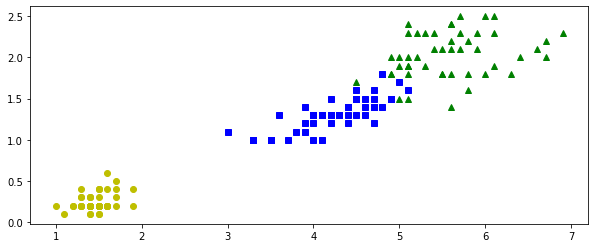

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

In [ ]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

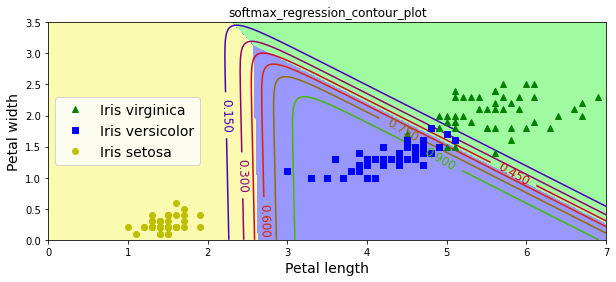

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")  # 2
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor") # 1
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")     # 0

plt.contourf(x0, x1, zz, cmap=custom_cmap) # color area!

contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg) # Iris versicolor

#-----------------------------------------
plt.clabel(contour, inline=1, fontsize=12)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.title("softmax_regression_contour_plot")
plt.show()